In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Datasets

In [2]:
column_names = ["user_id", "item_id", "rating", "timestamp"]
df = pd.read_csv("ml-100k/u.data", sep='\t', names = column_names)

In [3]:
df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [4]:
df.shape

(100000, 4)

In [5]:
df['user_id'].nunique()

943

In [6]:
df['item_id'].nunique()

1682

In [7]:
movie_titles = pd.read_csv("ml-100k/u.item", sep="\|", header=None)[[0,1]]

In [8]:
movie_titles.columns = ['item_id', 'title']
movie_titles.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [9]:
df = pd.merge(df, movie_titles, on="item_id")

## Data Analysis

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
df.groupby('title').mean()['rating'].sort_values(ascending=False).head()

title
They Made Me a Criminal (1939)                5.0
Marlene Dietrich: Shadow and Light (1996)     5.0
Saint of Fort Washington, The (1993)          5.0
Someone Else's America (1995)                 5.0
Star Kid (1997)                               5.0
Name: rating, dtype: float64

In [12]:
df.groupby('title').count()['rating'].sort_values(ascending=False).head()

title
Star Wars (1977)             583
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [13]:
ratings = pd.DataFrame(df.groupby('title').mean()['rating'])

In [14]:
ratings['rating_nums'] = pd.DataFrame(df.groupby('title').count()['rating'])

In [15]:
ratings.sort_values(by='rating', ascending=False)

,rating,rating_nums
title,,
They Made Me a Criminal (1939),5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
"Saint of Fort Washington, The (1993)",5.0,2
Someone Else's America (1995),5.0,1
Star Kid (1997),5.0,3
...,...,...
"Eye of Vichy, The (Oeil de Vichy, L') (1993)",1.0,1
King of New York (1990),1.0,1
Touki Bouki (Journey of the Hyena) (1973),1.0,1


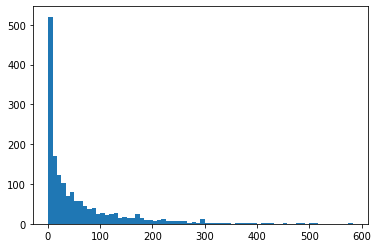

In [16]:
plt.hist(ratings['rating_nums'], bins=70)
plt.show()

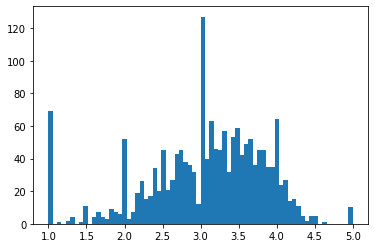

In [17]:
plt.hist(ratings['rating'], bins=70)
plt.show()

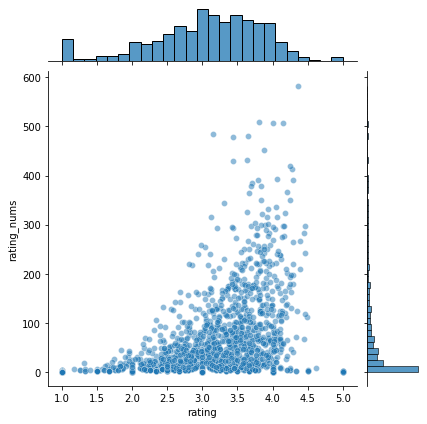

In [18]:
sns.jointplot(x='rating', y='rating_nums', data=ratings, alpha=0.5)

## Recommendation

In [19]:
df.head()

,user_id,item_id,rating,timestamp,title
0,196,242,3,881250949,Kolya (1996)
1,63,242,3,875747190,Kolya (1996)
2,226,242,5,883888671,Kolya (1996)
3,154,242,3,879138235,Kolya (1996)
4,306,242,5,876503793,Kolya (1996)


In [20]:
movie_mat = df.pivot_table(index='user_id', columns='title', values='rating')
movie_mat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,� k�ldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


In [21]:
ratings.sort_values('rating_nums', ascending=False).head()

,rating,rating_nums
title,,
Star Wars (1977),4.358491,583
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485


In [22]:
movie_mat["Star Wars (1977)"].head()

user_id
1    5.0
2    5.0
3    NaN
4    5.0
5    4.0
Name: Star Wars (1977), dtype: float64

In [23]:
corr_starwars = pd.DataFrame(movie_mat.corrwith(movie_mat["Star Wars (1977)"]), columns=['Correlation'])

In [24]:
corr_starwars.dropna(inplace=True)
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [25]:
corr_starwars.sort_values('Correlation', ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [26]:
corr_starwars = corr_starwars.join(ratings['rating_nums'])
corr_starwars.head()

,Correlation,rating_nums
title,,
'Til There Was You (1997),0.872872,9
1-900 (1994),-0.645497,5
101 Dalmatians (1996),0.211132,109
12 Angry Men (1957),0.184289,125
187 (1997),0.027398,41


In [27]:
corr_starwars[corr_starwars['rating_nums'] > 100].sort_values("Correlation", ascending=False).head(20)

,Correlation,rating_nums
title,,
Star Wars (1977),1.000000,583
"Empire Strikes Back, The (1980)",0.747981,367
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130
"Sting, The (1973)",0.367538,241
Indiana Jones and the Last Crusade (1989),0.350107,331
Pinocchio (1940),0.347868,101
"Frighteners, The (1996)",0.332729,115


## Prediction Function

In [28]:
def predict_movie(movie_name):
    movie_user_rating = movie_mat[movie_name]
    similar_to_movie = movie_mat.corrwith(movie_user_rating)
    
    corr_movie = pd.DataFrame(similar_to_movie, columns=['Correlation'])
    corr_movie.dropna(inplace=True)
    
    corr_movie = corr_movie.join(ratings['rating_nums'])
    predictions = corr_movie[corr_movie['rating_nums']>100].sort_values('Correlation', ascending=False)
    
    return predictions

In [29]:
predict_movie("Pinocchio (1940)").head(10)

,Correlation,rating_nums
title,,
Pinocchio (1940),1.000000,101
Rosewood (1997),0.784603,114
Mimic (1997),0.729011,101
L.A. Confidential (1997),0.721359,297
Dumbo (1941),0.692385,123
Chinatown (1974),0.614121,147
James and the Giant Peach (1996),0.611908,126
Being There (1979),0.570323,116
To Kill a Mockingbird (1962),0.559291,219
